In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

In [3]:
%store -r df_NPD

In [4]:
df_NPD.head()

,Categorie,Plante,Maladie,Saine,Suffixe,Abrev,AbrevMaladie,Rotation,Luminosite,Symetrie,...,Mode,Profondeur de couleur,Moyenne R,Moyenne G,Moyenne B,Taille du fichier,Set,DirPath,FileName,FilePath
0,Apple__Apple_scab,Apple,Apple_scab,0,270deg.jpg,FREC,Scab,270,0,0,...,RGB,8,109.957947,129.504242,119.117355,9606,valid,C:\Users\hadri\Plant project\data\1 New Plant ...,00075aa8-d81a-4184-8541-b692b78d398a___FREC_Sc...,C:\Users\hadri\Plant project\data\1 New Plant ...
1,Apple__Apple_scab,Apple,Apple_scab,0,90deg.jpg,FREC,Scab,90,0,0,...,RGB,8,110.123795,129.669220,119.235626,9960,valid,C:\Users\hadri\Plant project\data\1 New Plant ...,00075aa8-d81a-4184-8541-b692b78d398a___FREC_Sc...,C:\Users\hadri\Plant project\data\1 New Plant ...
2,Apple__Apple_scab,Apple,Apple_scab,0,new30degfliplr.jpg,FREC,Scab,30,0,LR,...,RGB,8,89.325546,109.759598,95.272110,10299,valid,C:\Users\hadri\Plant project\data\1 New Plant ...,00075aa8-d81a-4184-8541-b692b78d398a___FREC_Sc...,C:\Users\hadri\Plant project\data\1 New Plant ...
3,Apple__Apple_scab,Apple,Apple_scab,0,270deg.jpg,FREC,Scab,270,0,0,...,RGB,8,92.044342,125.152634,115.290207,11986,valid,C:\Users\hadri\Plant project\data\1 New Plant ...,01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Sc...,C:\Users\hadri\Plant project\data\1 New Plant ...
4,Apple__Apple_scab,Apple,Apple_scab,0,90deg.jpg,FREC,Scab,90,0,0,...,RGB,8,129.272934,125.058243,113.740295,20194,valid,C:\Users\hadri\Plant project\data\1 New Plant ...,0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Sc...,C:\Users\hadri\Plant project\data\1 New Plant ...


In [5]:
#Exploration des données et histogramme de densité via OpenCV

In [21]:
df_NPD.loc[0, 'FilePath']

'C:\\Users\\hadri\\Plant project\\data\\1 New Plant Disease\\Data\\valid\\Apple___Apple_scab\\00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_270deg.JPG'

In [38]:
test1 = df_NPD[df_NPD['Maladie'] == 'healthy'].iloc[0]
img_test1 = cv2.imread(test1['FilePath'])
test1['Plante'], test1['Maladie']

('Apple', 'healthy')

In [16]:
#Attention à bien appuyer sur une touche et ne pas utiliser la X de l'interface graphique. Je n'ai pas trouvé d'autres solutions pour l'instant
cv2.imshow('Photo', img_test1)
cv2.waitKey(0) #Pour attendre l'appui sur une touche
cv2.destroyAllWindows() #Pour nettoyer les images en mémoire

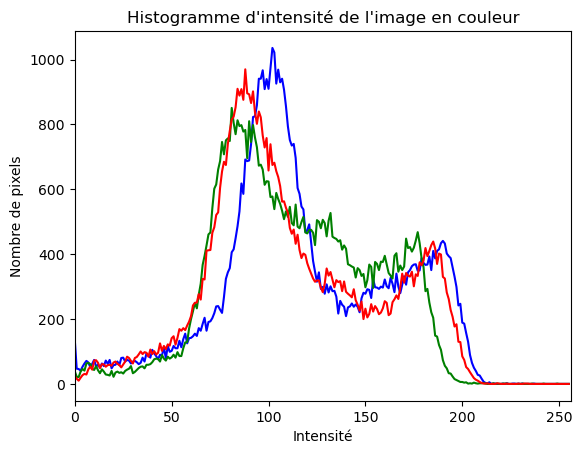

In [16]:
#Histogramme d'intensité
color = ('b','g','r')
for i,col in enumerate(color):
    histogram = cv2.calcHist([img_test1], [i], None, [256], [0,256])

    # Affichage de l'histogramme
    plt.plot(histogram, color = col)
    plt.xlim([0,256])

plt.title("Histogramme d'intensité de l'image en couleur")
plt.xlabel("Intensité")
plt.ylabel("Nombre de pixels")
plt.show()

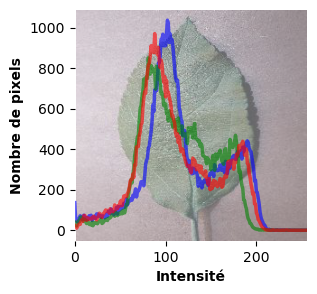

In [49]:
# Essai de superposition pour soutenance

# Créer une nouvelle figure
fig, ax1 = plt.subplots(figsize=(3,3))

# Calculer les histogrammes avant d'ajuster la luminosité
color = ('b','g','r')
histograms = []
for i,col in enumerate(color):
    histogram = cv2.calcHist([img_test1], [i], None, [256], [0,256])
    histograms.append(histogram)

# Créer une image blanche de la même taille que l'image originale
white_image = np.ones_like(img_test1) * 255

# Vous pouvez modifier cette variable pour changer la transparence de l'image
transparent_factor = 0.4

# Superposer l'image originale et l'image blanche
overlay_img = cv2.addWeighted(img_test1, 1 - transparent_factor, white_image, transparent_factor, 0)

# Afficher l'image
ax1.imshow(overlay_img)
ax1.axis('off')  # Enlever les axes pour l'image

# Ajouter un deuxième sous-plot pour l'histogramme
ax2 = fig.add_subplot(111, frame_on=False)  # Crée un deuxième axe qui partage le même x-axis

for i, histogram in enumerate(histograms):
    ax2.plot(histogram, color = color[i], alpha=0.6, linewidth=2.5)  # Augmenter la largeur de la ligne

# Configurer l'histogramme
ax2.set_xlim([0,256])

plt.xlabel("Intensité", weight='bold')
plt.ylabel("Nombre de pixels", weight='bold')
plt.show()

In [19]:
test2 = df_NPD.loc[0]
img_test2 = cv2.imread(test2['FilePath'])
test2['Plante'], test2['Maladie']

('Apple', 'Apple_scab')

In [20]:
#Attention à bien appuyer sur une touche et ne pas utiliser la X de l'interface graphique. Je n'ai pas trouvé d'autres solutions pour l'instant
cv2.imshow('Photo', img_test2)
cv2.waitKey(0) #Pour attendre l'appui sur une touche
cv2.destroyAllWindows() #Pour nettoyer les images en mémoire

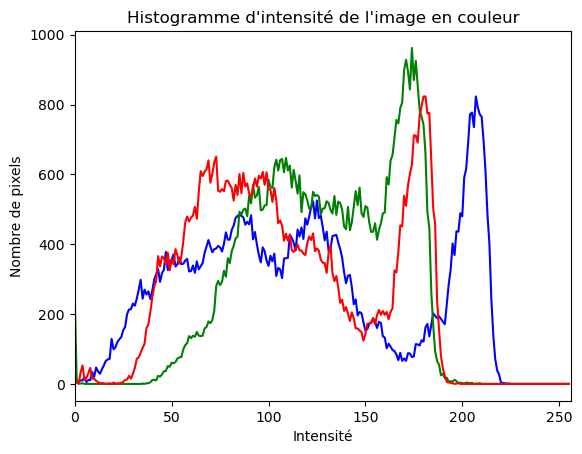

In [33]:
#Histogramme d'intensité
color = ('b','g','r')
for i,col in enumerate(color):
    histogram = cv2.calcHist([img_test2], [i], None, [256], [0,256])

    # Affichage de l'histogramme
    plt.plot(histogram, color = col)
    plt.xlim([0,256])

plt.title("Histogramme d'intensité de l'image en couleur")
plt.xlabel("Intensité")
plt.ylabel("Nombre de pixels")
plt.show()

In [22]:
test3 = df_NPD[df_NPD['Suffixe'] == 'newgrr.jpg'].iloc[0]
img_test3 = cv2.imread(test3['FilePath'])
test2['Plante'], test2['Maladie']

('Apple', 'Apple_scab')

In [23]:
cv2.imshow('Photo', img_test3)
cv2.waitKey(0) #Pour attendre l'appui sur une touche
cv2.destroyAllWindows() #Pour nettoyer les images en mémoire

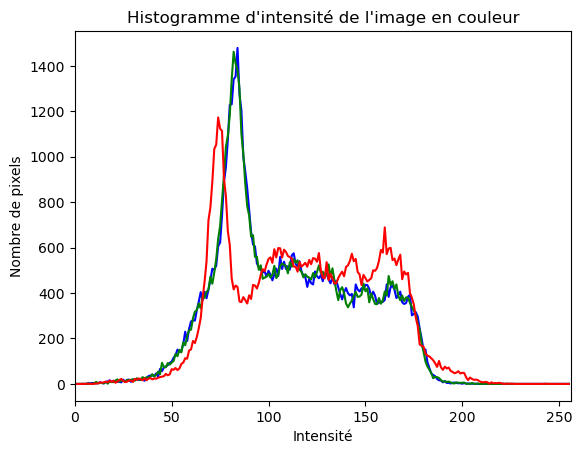

In [34]:
#Histogramme d'intensité
color = ('b','g','r')
for i,col in enumerate(color):
    histogram = cv2.calcHist([img_test3], [i], None, [256], [0,256])

    # Affichage de l'histogramme
    plt.plot(histogram, color = col)
    plt.xlim([0,256])

plt.title("Histogramme d'intensité de l'image en couleur")
plt.xlabel("Intensité")
plt.ylabel("Nombre de pixels")
plt.show()

In [26]:
test4 = df_NPD[df_NPD['Suffixe'] == 'new30degfliplr.jpg'].iloc[0]
img_test4 = cv2.imread(test4['FilePath'])
test2['Plante'], test2['Maladie']

('Apple', 'Apple_scab')

In [27]:
cv2.imshow('Photo', img_test4)
cv2.waitKey(0) #Pour attendre l'appui sur une touche
cv2.destroyAllWindows() #Pour nettoyer les images en mémoire

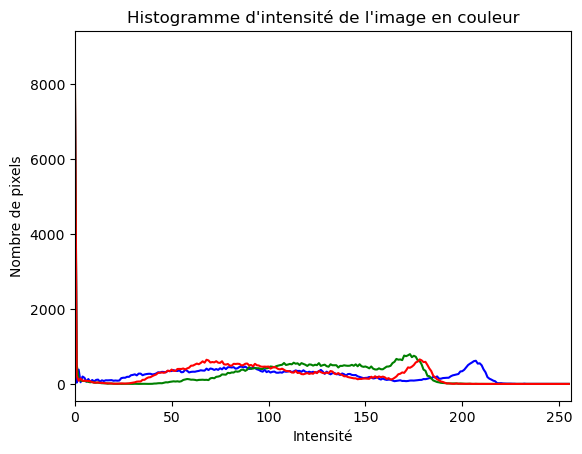

In [35]:
#Histogramme d'intensité
color = ('b','g','r')
for i,col in enumerate(color):
    histogram = cv2.calcHist([img_test4], [i], None, [256], [0,256])

    # Affichage de l'histogramme
    plt.plot(histogram, color = col)
    plt.xlim([0,256])

plt.title("Histogramme d'intensité de l'image en couleur")
plt.xlabel("Intensité")
plt.ylabel("Nombre de pixels")
plt.show()

In [ ]:
#Essai de mise en place de détourage

In [29]:
img_test4_gray = cv2.cvtColor(img_test4, cv2.COLOR_BGR2GRAY)

In [30]:
_, thresh4 = cv2.threshold(img_test4_gray, 150, 255, cv2.THRESH_BINARY_INV)

In [31]:
cv2.imshow('Thresholded Image', thresh4)
cv2.waitKey(0)
cv2.destroyAllWindows()